# Comparing Three Coins Family

Did you know, actually coins has it's own family, my trader friend's told me like this:

Family_1: BCD, BSV, BTG

Family_2: XRP, XLM, XEM

Family_3: TRX, BTT, JST

This notebook is presented to approve that statements

## 1. Import library

In [1]:
# Algorithm
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Activation, Dense, Dropout, LSTM
from keras.models import Sequential
import keras

# Accuracy
from sklearn.metrics import mean_absolute_error

# Processing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# Misc
import requests
import json
import time

## 2. Grabbing the master data

In [2]:
# Grab the data
url = 'https://min-api.cryptocompare.com/data/histoday'
response = requests.get(url + '?fsym=BTC&tsym=CAD&limit=1000')
data = pd.DataFrame(json.loads(response.content)['Data'])

# Only need the time and close so let's drop else
data = data[['time', 'close']]

# Make time as index
data = data.set_index('time')
data.index = pd.to_datetime(data.index, unit='s')

In [3]:
data.head()

,close
time,
2018-11-01,8509.65
2018-11-02,8744.29
2018-11-03,8612.14
2018-11-04,8520.42
2018-11-05,8721.97


## 3. Make master datasets

Who don't know BTC?, I will find what the biggest correlation that he give into the three family I declared before

In [14]:
df_btc = pd.DataFrame()

In [15]:
df_btc = data.copy()

In [16]:
df_btc.rename(columns={'close':'close_BTC'}, inplace=True)

In [17]:
df_btc 

,close_BTC
time,
2018-11-01,8509.65
2018-11-02,8744.29
2018-11-03,8612.14
2018-11-04,8520.42
2018-11-05,8721.97
...,...
2021-07-24,42902.82
2021-07-25,44521.71
2021-07-26,46966.10


BTC is used as the master

## 4. Grabbing family data

### A. Simple function for grabbing another coins

In [11]:
def grab_data(coin):
  coin = coin
  try:
    # Grab the data
    url = 'https://min-api.cryptocompare.com/data/histoday'
    response = requests.get(url + f'?fsym={coin}&tsym=CAD&limit=1000')
    data = pd.DataFrame(json.loads(response.content)['Data'])

    # Only need the close columns so let's drop else
    data = data[['close']]
    data = data.rename(columns={'close':f"close_{coin}"})

    time.sleep(1)
    print(f"Collecting {coin} data...")
    time.sleep(1)
    print("Saving the data")
    print('\a')
    return data

  except:
    print("Data excedded")
    print("Skipping")
    time.sleep(1)
    print('\a')

### B. Grab family memeber data

In [12]:
# Grab first family
BCD = grab_data('BCD')
BSV = grab_data('BSV') 
BTG = grab_data('BTG')

# Grab second family
XRP = grab_data('XRP') 
XLM = grab_data('XLM') 
XEM = grab_data('XEM')

# Grab third family
TRX = grab_data('TRX') 
BTT = grab_data('BTT')
JST = grab_data('JST')

Saving the data

Saving the data

Saving the data

Saving the data

Saving the data

Saving the data

Saving the data

Saving the data

Saving the data



In [13]:
# Family 1
family_1 = [BCD, BSV, BTG]

# Family 2
family_2 = [XRP, XLM, XEM]

# Family 3
family_3 = [TRX, BTT, JST]

## 5. Finding the correlation with the master

### A. Append every family into master dataset

In [19]:
for coin1, coin2, coin3 in zip(family_1, family_2, family_3):
  df_btc[coin1.columns[0]] = coin1.iloc[:,0].values
  df_btc[coin2.columns[0]] = coin2.iloc[:,0].values
  df_btc[coin3.columns[0]] = coin3.iloc[:,0].values

### B. Build correlation table between BTC and the three family

In [58]:
big_corr = df_btc.corr()
big_corr

,close_BTC,close_BCD,close_XRP,close_TRX,close_BSV,close_XLM,close_BTT,close_BTG,close_XEM,close_JST
close_BTC,1.000000,0.555268,0.708165,0.823346,0.446807,0.898535,0.744328,0.692838,0.872132,0.865454
close_BCD,0.555268,1.000000,0.834175,0.804660,0.256326,0.736330,0.753903,0.898678,0.398050,0.629465
close_XRP,0.708165,0.834175,1.000000,0.936457,0.311604,0.851522,0.880619,0.943887,0.573653,0.791695
close_TRX,0.823346,0.804660,0.936457,1.000000,0.398489,0.877655,0.950885,0.932292,0.668859,0.905454
close_BSV,0.446807,0.256326,0.311604,0.398489,1.000000,0.307944,0.382979,0.330426,0.337149,0.439761
close_XLM,0.898535,0.736330,0.851522,0.877655,0.307944,1.000000,0.775982,0.819173,0.828988,0.828113
close_BTT,0.744328,0.753903,0.880619,0.950885,0.382979,0.775982,1.000000,0.912931,0.545928,0.846896
close_BTG,0.692838,0.898678,0.943887,0.932292,0.330426,0.819173,0.912931,1.000000,0.523463,0.765723
close_XEM,0.872132,0.398050,0.573653,0.668859,0.337149,0.828988,0.545928,0.523463,1.000000,0.738209
close_JST,0.865454,0.629465,0.791695,0.905454,0.439761,0.828113,0.846896,0.765723,0.738209,1.000000


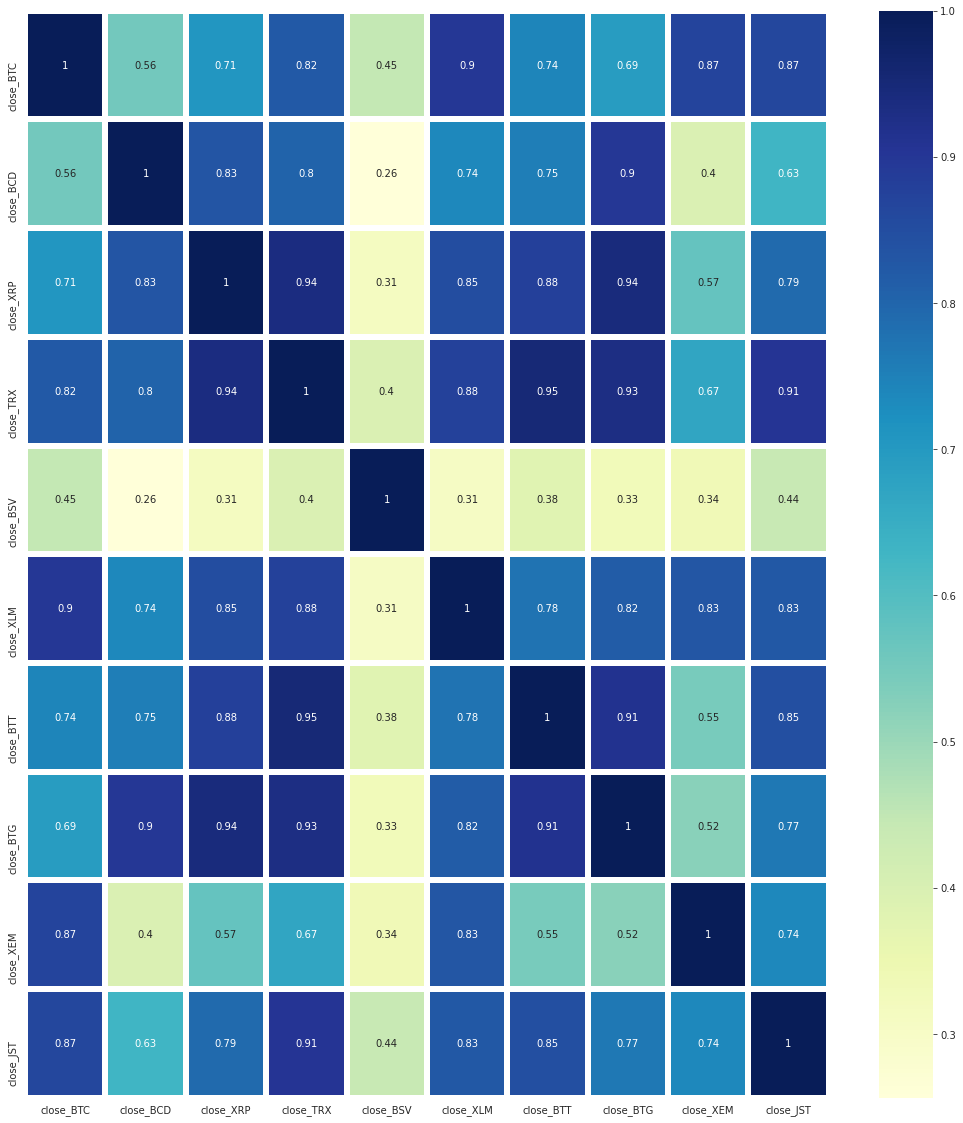

In [22]:
plt.figure(figsize=(18,20))
sns.set_style('dark')
sns.heatmap(big_corr, annot=True, linecolor='white', linewidth=5, cmap='YlGnBu')

Okay, here is the list of correlation that I found

**Value >= 90%**
* XLM - BTC : 0.9 
* BTG - BCD : 0.9
* BTG - XRP : 0.94
* BTG - TRX : 0.93
* JST - TRX : 0.91
* XRP - TRX : 0.94

Hmm writting like this, is too boring and eye catchy

Let only display what important

### C. All corelation more than 90%

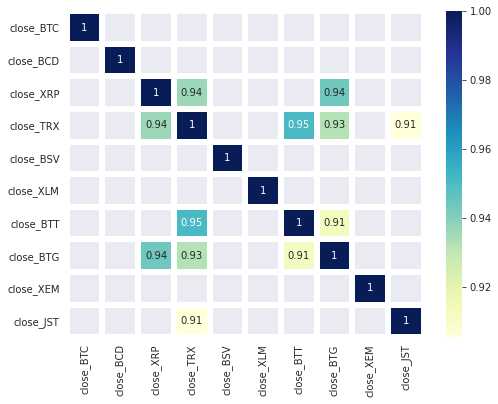

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(big_corr[big_corr >= 0.90], annot=True, linecolor='white', linewidth=5, cmap='YlGnBu')

From the heatmap above we got the correlation with value >= 90% is between

**XRP LINES**
* XRP - TRX : 0.94
* XRP - BTG : 0.94

**TRX LINES**
* TRX - BTT : 0.95
* TRX - BTG : 0.93
* TRX - JST : 0.91

**BTT LINES**
* BTT - TRX : 0.95
* BTT - BTG : 0.91

**BTG LINES**
* BTG - XRP : 0.94
* BTG - TRX : 0.93
* BTG - BTT : 0.91

**JST LINES**
* JST - TRX : 0.91

Well, the truth is before I got 0.9 in most of BTC but now they are gone

I just realize that the value is about 0.89xx and rounded into 0.9

So, by displaying more specific value, will make it great predictions

### C. All corelation more than 85% and less than 90%

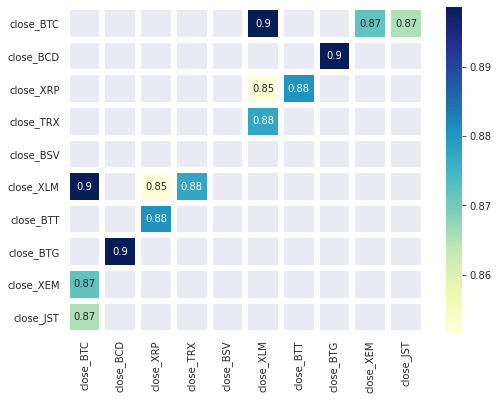

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(big_corr[(big_corr >= 0.85) & (big_corr < 0.9)], annot=True, linecolor='white', linewidth=5, cmap='YlGnBu')

From the heatmap above we got the correlation with value >= 0.85 and < 0.9

**BTC LINES**
* BTC - XLM : 0.90
* BTC - XEM : 0.87
* BTC - JST : 0.87

**BCD LINES**
* BCD - BTG : 0.9

**XRP LINES**
* XRP - XLM : 0.85
* XRP - BTT : 0.88

**TRX LINES**
* TRX - XLM : 0.88

**XLM LINES**
* XLM - BTC : 0.9
* XLM - XRP : 0.85
* XLM - TRX : 0.88

**BTT LINES**
* BTT - XRP : 0.88

**BTG LINES**
* BTG - BCD : 0.9

**XEM LINES**
* XEM - BTC : 0.87

**JST LINES**
* JST - BTC : 0.87

### D. All corelation more than 80% and less than 85%

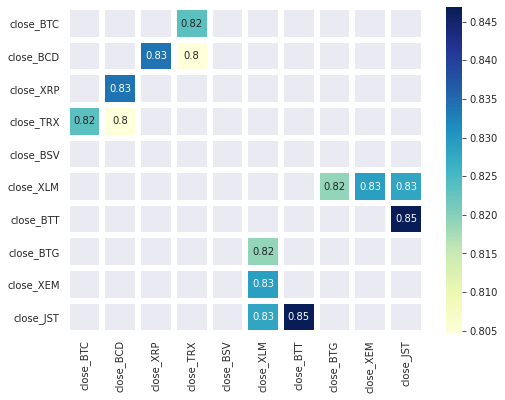

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(big_corr[(big_corr >= 0.80) & (big_corr < 0.85)], annot=True, linecolor='white', linewidth=5, cmap='YlGnBu')

From the heatmap above we got the correlation with value >= 0.85 and < 0.9

**BTC LINES**
* BTC - TRX : 0.82

**BCD LINES**
* BCD - XRP : 0.83
* BCD - TRX : 0.8

**XRP LINES**
* XRP - BCD : 0.83

**TRX LINES**
* TRX - BTC : 0.82
* TRX - BCD : 0.8

**XLM LINES**
* XLM - BTG : 0.82
* XLM - XEM : 0.83
* XLM - JST : 0.83

**BTT LINES**
* BTT - JST : 0.85

**BTG LINES**
* BTG - XLM : 0.82

**XEM LINES**
* XEM - XLM : 0.83

**JST LINES**
* JST - XLM : 0.83
* JST - BTT : 0.85

### E. All corelation less than 50%

The value between 50 - 80 is average value, so I just skip it, and the value < 50 has no big effect in correlation

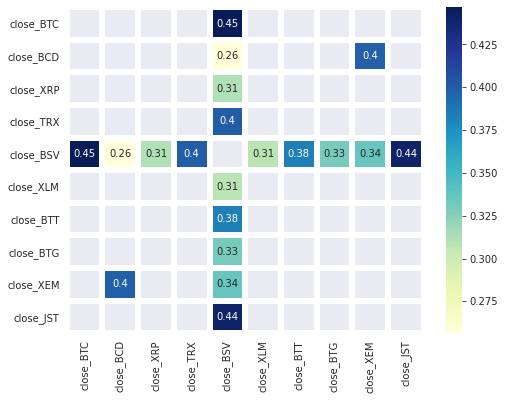

In [62]:
plt.figure(figsize=(8,6))
sns.heatmap(big_corr[big_corr < 0.5], annot=True, linecolor='white', linewidth=5, cmap='YlGnBu')

From the heatmap above, we can conclude that BSV has no relate for most coin I provide above. 

Also XEM and BCD has a little correlation value

## 6. Correlation between family

### A. Family 1

In [68]:
fams_1 = list(['close_BCD', 'close_BSV', 'close_BTG'])

fams1_corr = df_btc[fams_1].corr()
fams1_corr

,close_BCD,close_BSV,close_BTG
close_BCD,1.000000,0.256326,0.898678
close_BSV,0.256326,1.000000,0.330426
close_BTG,0.898678,0.330426,1.000000


From the table above, we know that 

* BCD has big correlation with BTG (above average)
* BSV has no correlation with either BCD or BTG

[BSV isn't family with BCD and BSV]

### B. Family 2

In [69]:
fams_2 = list(['close_XRP', 'close_XLM', 'close_XEM'])

fams2_corr = df_btc[fams_2].corr()
fams2_corr

,close_XRP,close_XLM,close_XEM
close_XRP,1.000000,0.851522,0.573653
close_XLM,0.851522,1.000000,0.828988
close_XEM,0.573653,0.828988,1.000000


From the table above, we know that 

* XRP has big correlation with XLM (above average)
* XRP has no correlation with XEM 
* XLM has big correlation with XEM (above average)

[XLM has relation between XRP and XEM, but XRP and XEM is different]

### C. Family 3

In [70]:
fams_3 = list(['close_TRX', 'close_BTT', 'close_JST'])

fams3_corr = df_btc[fams_3].corr()
fams3_corr

,close_TRX,close_BTT,close_JST
close_TRX,1.000000,0.950885,0.905454
close_BTT,0.950885,1.000000,0.846896
close_JST,0.905454,0.846896,1.000000


From the table above, we know that 

* TRX has big correlation with BTT and JST
* BTT and JST has big correlation (above average)

Average from me is above 80

[BTT, TRX, JST has common correlation, it can say they are family]

## 7. Plotting the data

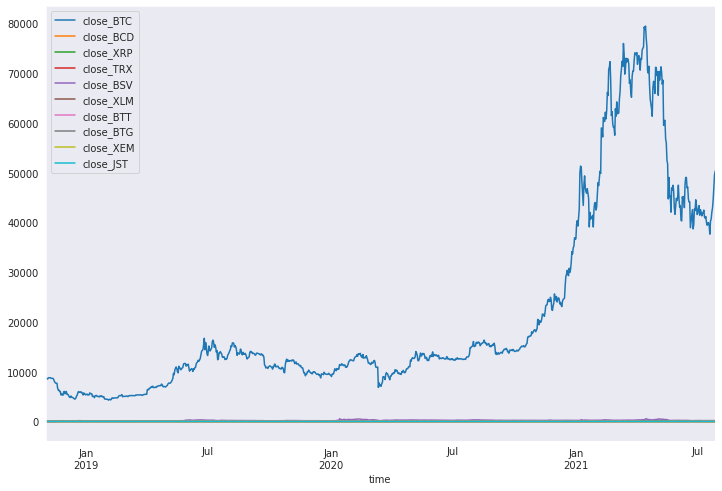

In [66]:
df_btc.plot(figsize=(12, 8))

The picture above shows that the distribution of the data is not good, let use instead in yscale so it can more readable

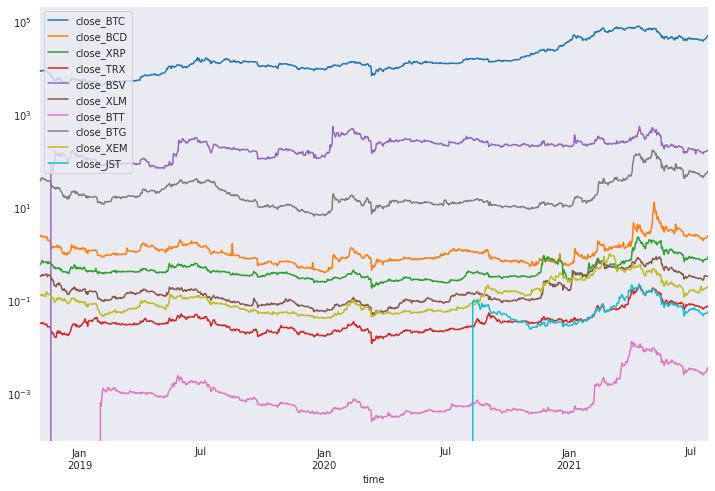

In [65]:
df_btc.plot(figsize=(12, 8))
plt.yscale('log')

As you can see, we got all visualization using logging scale, so I can see all data and from it.

Did you see, that all of them has pattern has same pattern with BTC?

Well, from my view, all of them has the same pattern, but actually the they have different correlation just like we found before

## 8. Conclusion

Finnaly, here I collect all the conclusion


1. BTC is the ruler from most of coins
2. BSV isn't family with BCD and BSV
3. XLM has relation between XRP and XEM, but XRP and XEM is different
4. BTT, TRX, JST has common correlation, it can say they are family

Thank you!!!

$Bogor, July 29^{th} 2021$